# Classifier Comparison Notebook

This notebook trains and evaluates three different classifiers:
- Decision Tree
- k-Nearest Neighbors (k-NN)
- Support Vector Machine (SVM)

Each model is evaluated on the same dataset with accuracy, classification report, and visualizations.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.decomposition import PCA

# Load dataset
train_df = pd.read_csv('train.csv')
X = train_df.drop(columns=['id', 'Target'])
y = train_df['Target']

# Encode target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train-validation split
X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

## Decision Tree

In [2]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred_dt = clf.predict(X_val)
dt_accuracy = accuracy_score(y_val, y_pred_dt)
print("Decision Tree Accuracy:", dt_accuracy)

Decision Tree Accuracy: 0.742093570308416


## k-NN

In [3]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_val_scaled)
knn_accuracy = accuracy_score(y_val, y_pred_knn)
print("k-NN Accuracy:", knn_accuracy)

k-NN Accuracy: 0.7786199686356509


## SVM

In [4]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_val_scaled)
svm_accuracy = accuracy_score(y_val, y_pred_svm)
print("SVM Accuracy:", svm_accuracy)

SVM Accuracy: 0.8200470465237847


## Model Comparison

In [5]:
print("Decision Tree:", accuracy_score(y_val, y_pred_dt))
print("k-NN:", accuracy_score(y_val, y_pred_knn))
print("SVM:", accuracy_score(y_val, y_pred_svm))

Decision Tree: 0.742093570308416
k-NN: 0.7786199686356509
SVM: 0.8200470465237847


In [6]:
from sklearn.metrics import confusion_matrix

# Assuming you already have predictions: y_pred_dt, y_pred_knn, y_pred_svm
dt_cm = confusion_matrix(y_val, y_pred_dt)
knn_cm = confusion_matrix(y_val, y_pred_knn)
svm_cm = confusion_matrix(y_val, y_pred_svm)

class_names = le.classes_  # if you used LabelEncoder on y


## 📊 Model Comparison & Visualization

/var/folders/zc/j7nfjlk52w97t5_4q_gv_l400000gn/T/ipykernel_2000/3703071061.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accuracies, y=model_names, palette='viridis')


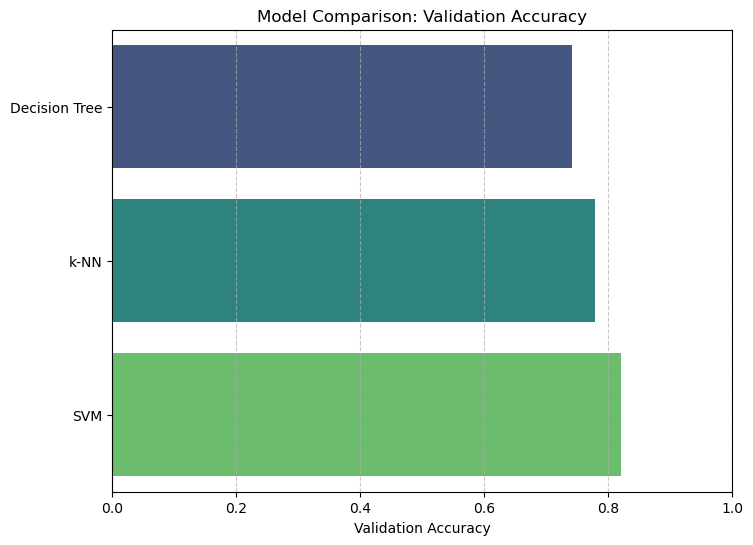

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Accuracy scores for models
model_names = ['Decision Tree', 'k-NN', 'SVM']
accuracies = [dt_accuracy, knn_accuracy, svm_accuracy]

# Bar plot for model comparison
plt.figure(figsize=(8, 6))
sns.barplot(x=accuracies, y=model_names, palette='viridis')
plt.xlabel('Validation Accuracy')
plt.title('Model Comparison: Validation Accuracy')
plt.xlim(0, 1)
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.show()


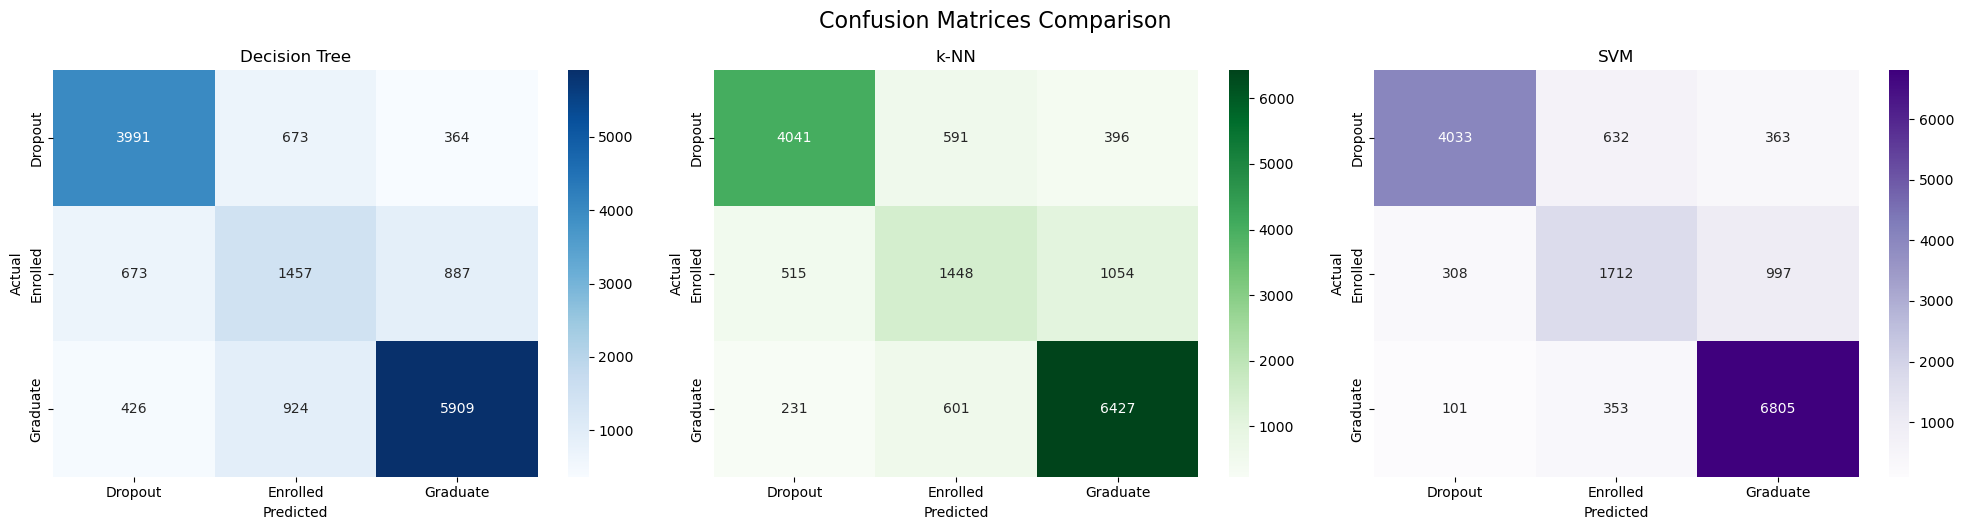

In [8]:
# Confusion Matrices Side by Side
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names, ax=axs[0])
axs[0].set_title('Decision Tree')
axs[0].set_xlabel('Predicted')
axs[0].set_ylabel('Actual')

sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=class_names, yticklabels=class_names, ax=axs[1])
axs[1].set_title('k-NN')
axs[1].set_xlabel('Predicted')
axs[1].set_ylabel('Actual')

sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=class_names, yticklabels=class_names, ax=axs[2])
axs[2].set_title('SVM')
axs[2].set_xlabel('Predicted')
axs[2].set_ylabel('Actual')

plt.tight_layout()
plt.suptitle("Confusion Matrices Comparison", y=1.05, fontsize=16)
plt.show()


In [9]:
from sklearn.metrics import classification_report

# Generate classification reports
dt_report = classification_report(y_val, y_pred_dt, target_names=le.classes_)
knn_report = classification_report(y_val, y_pred_knn, target_names=le.classes_)
svm_report = classification_report(y_val, y_pred_svm, target_names=le.classes_)


In [10]:
# Optional: Show classification reports for all models
print("Decision Tree Report:")
print(dt_report)
print("k-NN Report:")
print(knn_report)
print("SVM Report:")
print(svm_report)


Decision Tree Report:
              precision    recall  f1-score   support

     Dropout       0.78      0.79      0.79      5028
    Enrolled       0.48      0.48      0.48      3017
    Graduate       0.83      0.81      0.82      7259

    accuracy                           0.74     15304
   macro avg       0.70      0.70      0.70     15304
weighted avg       0.74      0.74      0.74     15304

k-NN Report:
              precision    recall  f1-score   support

     Dropout       0.84      0.80      0.82      5028
    Enrolled       0.55      0.48      0.51      3017
    Graduate       0.82      0.89      0.85      7259

    accuracy                           0.78     15304
   macro avg       0.74      0.72      0.73     15304
weighted avg       0.77      0.78      0.77     15304

SVM Report:
              precision    recall  f1-score   support

     Dropout       0.91      0.80      0.85      5028
    Enrolled       0.63      0.57      0.60      3017
    Graduate       0.83     